In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('5th_Lesson/data/turboaz.csv')

In [4]:
df = df[['Buraxilish ili', 'Qiymet']].copy()

In [5]:
def applyAZN(col):
    lst = col.split()
    if 'AZN' in col:
        return float(lst[0])
    if '$' in col:
        return float(lst[0]) * 1.7
    return 0

df['Qiymet'] = df['Qiymet'].apply(applyAZN)

In [6]:
df.dtypes

Buraxilish ili      int64
Qiymet            float64
dtype: object

In [7]:
df

,Buraxilish ili,Qiymet
0,1999,12500.0
1,2014,53550.0
2,2002,11700.0
3,1998,9700.0
4,2000,12700.0
...,...,...
1323,1996,8800.0
1324,1994,6300.0
1325,1998,10900.0
1326,2000,11300.0


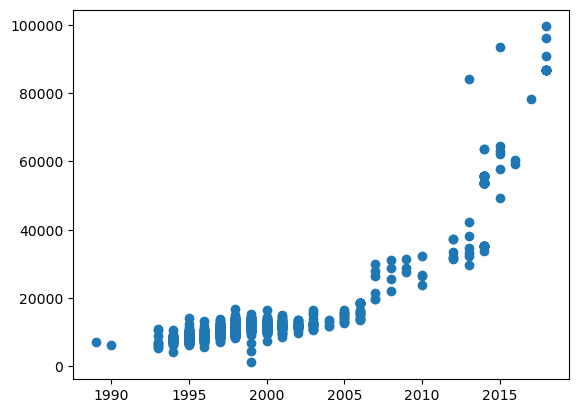

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df['Buraxilish ili'], df['Qiymet'])

In [16]:
import numpy as np

In [17]:
def cost_function(X, Y, W):
    h = X.dot(W)
    J = np.sum(((h-Y)**2)/(2*len(Y)))
    return J

In [18]:
df2 = df.copy()

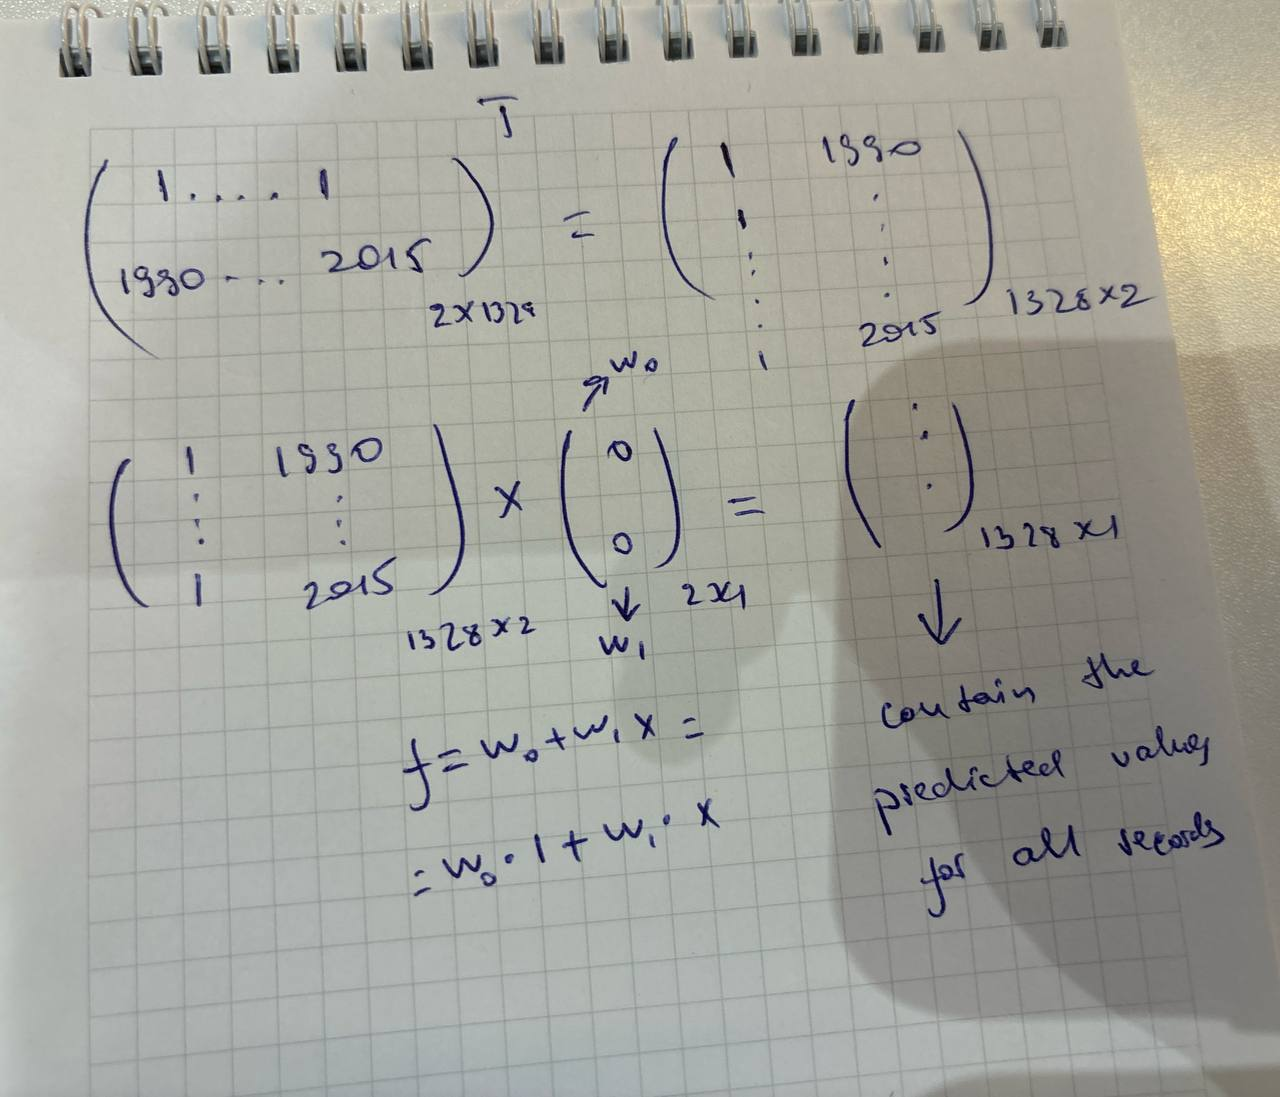

In [65]:
from IPython.display import Image

PATH = "C:\\Users\\gulma\\Downloads\\"
Image(filename = PATH + "matrix_1.jpeg", width=400, height=300)


In [43]:
df['Buraxilish ili'] = (df['Buraxilish ili'] - df['Buraxilish ili'].mean()) / df['Buraxilish ili'].std()
df['Qiymet'] = (df['Qiymet'] - df['Qiymet'].mean())/df['Qiymet'].std()

x0 = np.ones(len(df))


inputs = np.array([x0, df['Buraxilish ili']]).T 
print(np.array([x0, df['Buraxilish ili']]).shape)
w = np.array([0, 0])
print(w.shape)
outputs = df['Qiymet']

(2, 1328)
(2,)


In [22]:
cost_function(inputs, outputs, w)

0.4996234939759033

In [66]:
cost_historical = []

def gradient_descent(X, Y, W, alpha=0.001, iteration=10000):
    for i in range(iteration):
        h = X.dot(W)
        diff = h - Y
        g = (X.T.dot(diff))/len(Y)
        W = W - alpha * g
        cost_historical.append(cost_function(X, Y, W))
    return W

In [68]:
final_coef = gradient_descent(inputs, outputs, w)

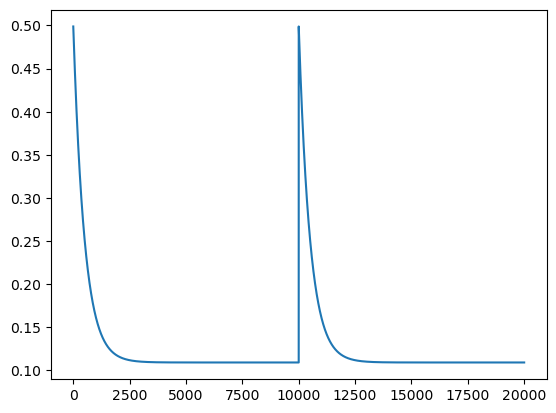

In [70]:
from matplotlib import pyplot as plt
plt.plot(cost_historical)

In [49]:
df

,Buraxilish ili,Qiymet
0,-0.162484,-0.191676
1,2.652017,2.815558
2,0.400416,-0.250282
3,-0.350117,-0.396798
4,0.025150,-0.177024
...,...,...
1323,-0.725384,-0.462730
1324,-1.100651,-0.645874
1325,-0.350117,-0.308888
1326,0.025150,-0.279585


In [50]:
df2

,Buraxilish ili,Qiymet,Prediction,diff
0,-0.162484,-0.191676,-0.143649,0.048026
1,2.652017,2.815558,2.344608,0.470950
2,0.400416,-0.250282,0.354002,0.604284
3,-0.350117,-0.396798,-0.309533,0.087264
4,0.025150,-0.177024,0.022234,0.199259
...,...,...,...,...
1323,-0.725384,-0.462730,-0.641301,0.178571
1324,-1.100651,-0.645874,-0.973069,0.327194
1325,-0.350117,-0.308888,-0.309533,0.000645
1326,0.025150,-0.279585,0.022234,0.301820


In [51]:
year = 1994
price = 6300.0

yearNorm = (year - df2['Buraxilish ili'].mean()) / df2['Buraxilish ili'].std()

prediction = final_coef[0] * 1 + final_coef[1] * yearNorm

In [31]:
prediction

1762.8656624847058

In [32]:
yearNorm

1993.999999999993

In [33]:
prediction * df2.Qiymet.std() + df2.Qiymet.mean()

1762.8656624847058

In [34]:
df2['Prediction'] = (final_coef[0] * 1 + final_coef[1] * ((df2['Buraxilish ili'] - df2['Buraxilish ili'].mean())/df2['Buraxilish ili'].std())) * df2.Qiymet.std() + df2.Qiymet.mean()

In [35]:
(df2['Prediction'] - df2['Qiymet']).apply(abs).min()

0.0006449916135855549

In [36]:
df2['diff'] = (df2['Prediction'] - df2['Qiymet']).apply(abs)

In [29]:
df2[df2['diff'] == df2['diff'].max()]

,Buraxilish ili,Qiymet,Prediction,diff
109,2015,93500.0,49385.725644,44114.274356
